<a href="https://colab.research.google.com/github/hugoriosbrito/MLModels/blob/main/Fashion_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [14]:
import tensorflow as tf
import PIL.Image, PIL.ImageOps
from PIL import Image
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from rembg import remove
from PIL import Image

In [2]:
mnist_fashion = tf.keras.datasets.fashion_mnist
(x_train, y_train), (x_test, y_test) = mnist_fashion.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [43]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(28,28,1)),
    tf.keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(2,2)),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

In [44]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [45]:
r = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=15)

Epoch 1/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.8142 - loss: 0.5212 - val_accuracy: 0.8890 - val_loss: 0.3075
Epoch 2/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9000 - loss: 0.2781 - val_accuracy: 0.9001 - val_loss: 0.2787
Epoch 3/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9136 - loss: 0.2335 - val_accuracy: 0.9039 - val_loss: 0.2638
Epoch 4/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9254 - loss: 0.2023 - val_accuracy: 0.9020 - val_loss: 0.2720
Epoch 5/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9326 - loss: 0.1828 - val_accuracy: 0.9067 - val_loss: 0.2693
Epoch 6/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.9411 - loss: 0.1585 - val_accuracy: 0.9126 - val_loss: 0.2550
Epoch 7/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9456 - loss: 0.1446 - val_accuracy: 0.9140 - val_loss: 0.2625
Epoch 8/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9513 - loss: 0.127

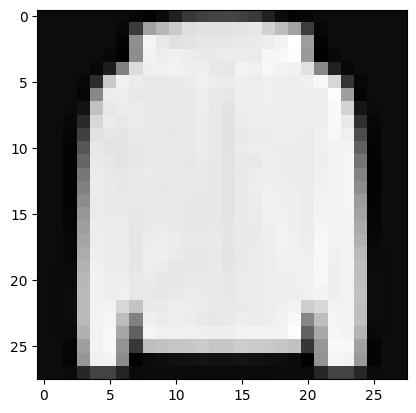

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
Casaco


In [56]:
img_class = PIL.Image.open('/content/images4.jpeg').convert('L')
img_class = img_class.resize((28,28))
img_class = PIL.ImageOps.invert(img_class)
plt.imshow(img_class, cmap='gray')
plt.show()
img_class = np.array(img_class)

pred = model.predict(img_class.reshape(1,28,28,1))
if np.argmax(pred) == 0:
  print('T-shirt/top')
elif np.argmax(pred) == 1:
  print('Calça')
elif np.argmax(pred) == 2:
  print('Suéter')
elif np.argmax(pred) == 3:
  print('Vestido')
elif np.argmax(pred) == 4:
  print('Casaco')
elif np.argmax(pred) == 5:
  print('Sandália')
elif np.argmax(pred) == 6:
  print('Camisa')
elif np.argmax(pred) == 7:
  print('Tênis')
elif np.argmax(pred) == 8:
  print('Bolsa')
elif np.argmax(pred) == 9:
  print('Bota')
